# Bank Credit Scoring: Predicting Loan Default

## Project Overview
This project aims to build a machine learning model that predicts the probability of loan default by bank clients.

**Business Goal:** Help financial institutions assess credit risk and make informed lending decisions.

## Project Structure
1. **Data Loading & Exploration:** Understanding the dataset structure and contents
2. **Data Preprocessing:** Handling missing values, outliers, and encoding categorical features
3. **Model Training & Evaluation:** Building multiple models and comparing their performance
4. **Conclusions:** Selecting the best model and summarizing findings


## 1. Library Imports

Let's import all necessary libraries for data analysis, visualization, and model building.


In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot styling for better visualization
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12


Setting a fixed random state value to ensure reproducibility of results.


In [91]:
RANDOM_STATE = 42


In [92]:
DATASET_PATH = "~/development/ML/datasets/credit_scoring.csv"


In [93]:
# Load the dataset
df = pd.read_csv(DATASET_PATH)


## 2. Data Exploration

### Feature Description

**Target Variable**
- `SeriousDlqin2yrs`: Whether the client experienced a 90+ day delinquency (1 = Yes, 0 = No)

**Features**
- `RevolvingUtilizationOfUnsecuredLines`: Total balance on credit cards and personal lines of credit (excluding real estate and installment debt) divided by the sum of credit limits
- `age`: Borrower's age in years
- `NumberOfTime30-59DaysPastDueNotWorse`: Number of times borrower has been 30-59 days past due (last 2 years)
- `DebtRatio`: Monthly debt payments divided by monthly income
- `MonthlyIncome`: Borrower's monthly income
- `NumberOfOpenCreditLinesAndLoans`: Number of open loans and credit lines (e.g., car loans, mortgages, credit cards)
- `NumberOfTimes90DaysLate`: Number of times borrower has been 90+ days past due
- `RealEstateLoansOrLines`: Encoded number of mortgage/real estate loans (higher letter code = more loans)
- `NumberOfTime60-89DaysPastDueNotWorse`: Number of times borrower has been 60-89 days past due (last 2 years)
- `NumberOfDependents`: Number of dependents (spouse, children, etc.)
- `GroupAge`: Encoded age group (higher code = older age)


In [94]:
# Display basic dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   135155 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 9   NumberOfDependents                    146076 non-null  float64
 10  RealEstateLoansOrLines                150000 non-null  object 
 11  

In [95]:
# View three random samples from the dataset
df.sample(3)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
105069,0,0.554386,48.0,5,7731.000000,NaN,19,0,0,0.0,A,c
103925,0,0.067025,51.0,0,0.008587,8500.0,8,0,0,0.0,A,d
73423,0,0.098408,47.0,0,0.069744,8100.0,6,0,0,2.0,A,c


In [96]:
# Display first 10 rows
df.head(10)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
0,0,0.221813,43.0,0,0.527888,3280.0,7,0,0,2.0,A,c
1,0,0.602794,25.0,0,0.065868,333.0,2,0,0,0.0,A,b
2,1,0.025656,38.0,0,0.475841,3000.0,7,0,0,2.0,A,c
3,0,0.075427,32.0,0,0.085512,7916.0,6,0,0,0.0,A,b
4,0,0.046560,58.0,0,0.241622,2416.0,9,0,0,0.0,A,d
5,1,0.392248,50.0,0,1.595253,4676.0,14,0,0,1.0,B,d
6,0,0.034421,69.0,0,0.042383,2500.0,17,0,0,1.0,A,e
7,0,0.392995,58.0,2,0.436103,5500.0,15,0,0,0.0,A,d
8,1,0.695321,38.0,0,0.618575,7859.0,8,0,0,3.0,A,c
9,0,0.055950,53.0,0,0.052868,2666.0,7,0,0,0.0,A,d


In [97]:
# Statistical summary of numerical features
df.describe()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,135155.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.293618,0.421033,353.005076,6.670221e+03,8.452760,0.265973,0.240387,0.757222
std,0.249746,249.755371,14.772577,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,98.000000,20.000000


In [98]:
# Summary of categorical features
df.describe(include='object')


,RealEstateLoansOrLines,GroupAge
count,150000,150000
unique,5,5
top,A,d
freq,140048,47268


## 3. Exploratory Data Analysis

### 3.1 Univariate Analysis

Let's examine the distribution of key variables.


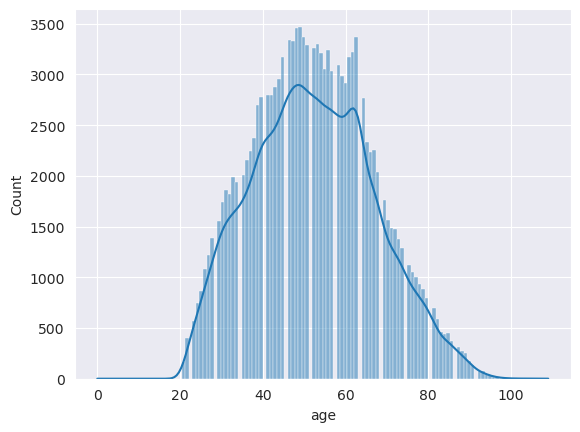

In [99]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, color='steelblue')
plt.title('Distribution of Customer Age', fontsize=16)
plt.xlabel('Age (years)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()


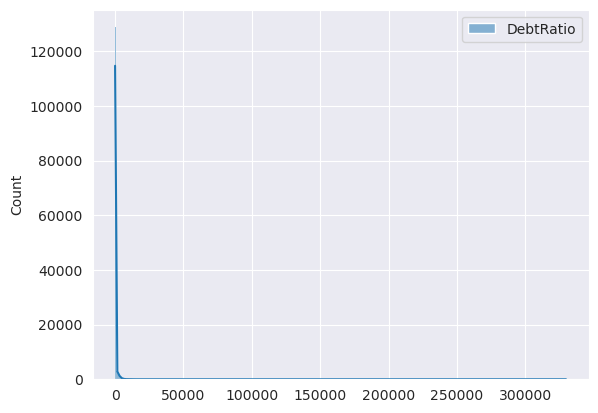

In [100]:
# Debt ratio distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['DebtRatio'], kde=True, color='darkred')
plt.title('Distribution of Debt Ratio', fontsize=16)
plt.xlabel('Debt Ratio', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()


In [101]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values by column:")
print(missing_values[missing_values > 0])

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")


age                   14845
MonthlyIncome         29731
NumberOfDependents     3924
dtype: int64
Дубликаты: 634


SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64
SeriousDlqin2yrs
0    0.93316
1    0.06684
Name: proportion, dtype: float64


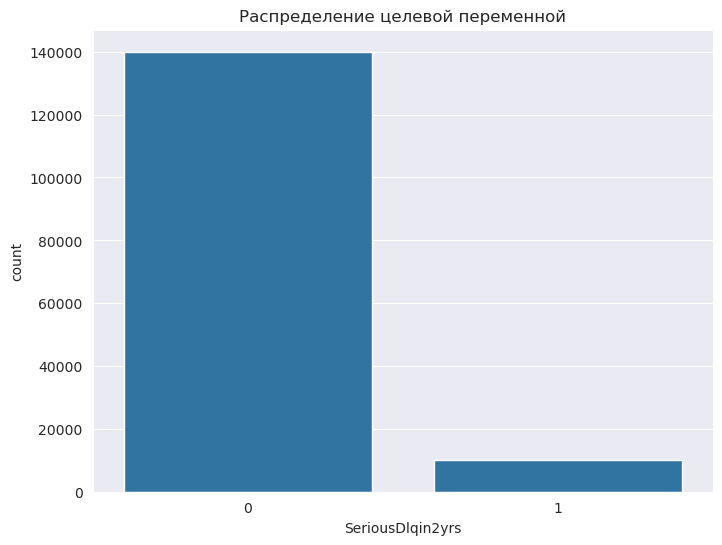

In [102]:
# Target variable distribution
print("Target Variable Distribution:")
print(df['SeriousDlqin2yrs'].value_counts())
print("\nTarget Variable Distribution (%):")
print(df['SeriousDlqin2yrs'].value_counts(normalize=True).round(4) * 100)

# Visualize target distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='SeriousDlqin2yrs', data=df, palette=['skyblue', 'salmon'])
plt.title('Distribution of Target Variable (Default)', fontsize=16)
plt.xlabel('Default Status (1 = Default, 0 = No Default)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add percentage labels
for p in ax.patches:
    percentage = f'{100 * p.get_height() / len(df):.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.grid(True, alpha=0.3)
plt.show()


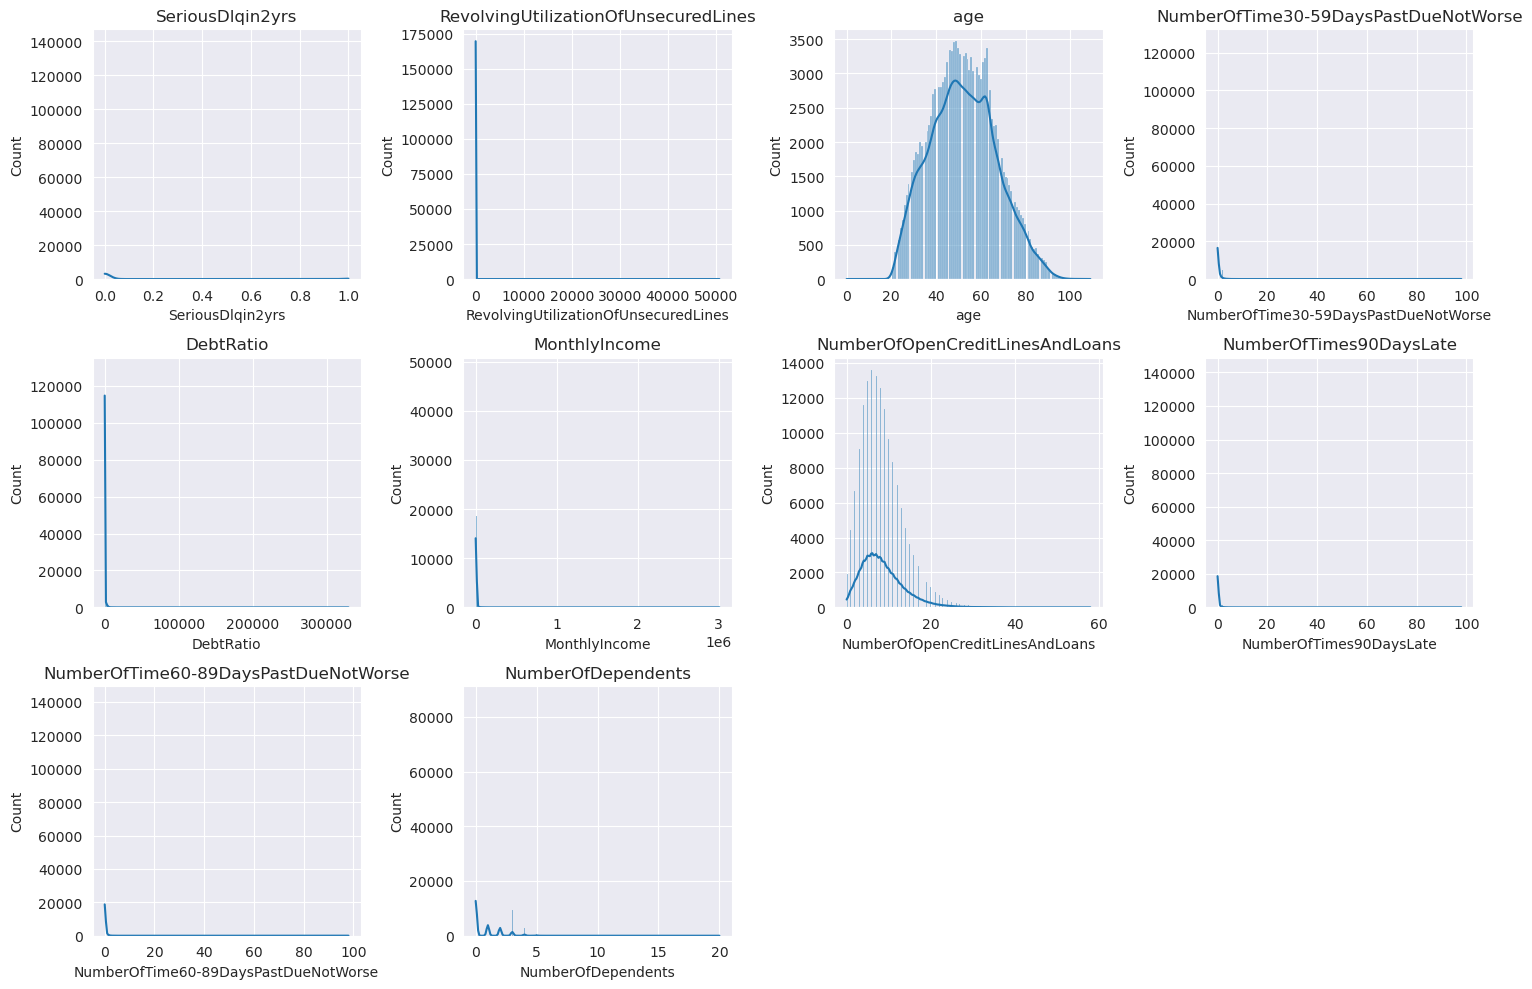

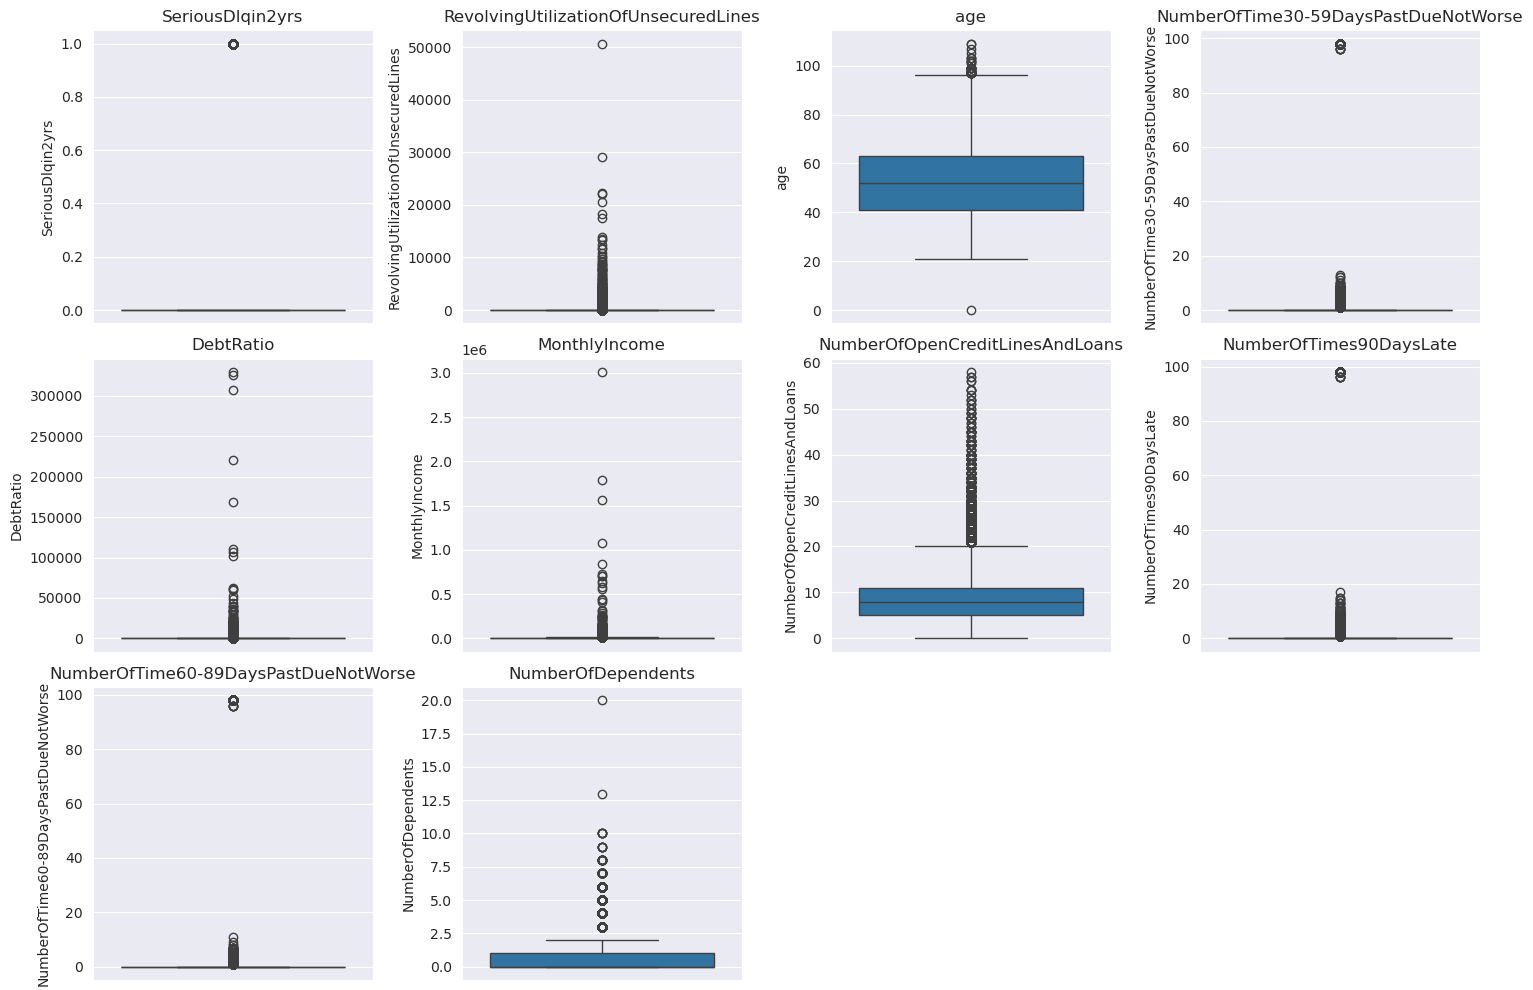

In [103]:
# Histograms for numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[feature], kde=True, color='darkblue', alpha=0.7)
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Boxplots to identify outliers
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[feature], color='forestgreen')
    plt.title(f'Boxplot of {feature}', fontsize=12)
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


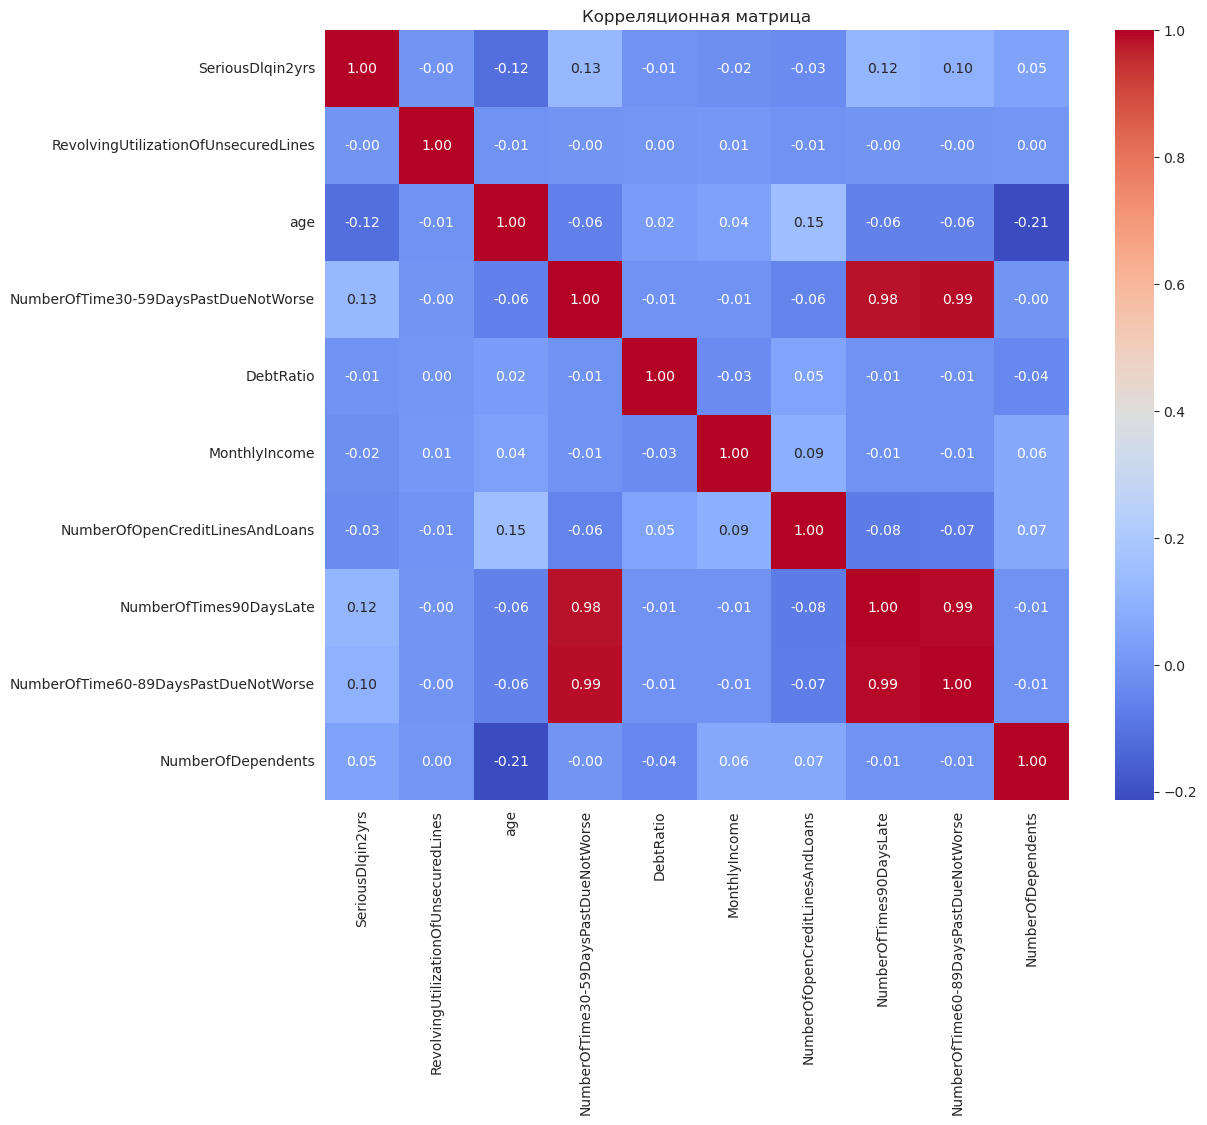

In [104]:
# Correlation matrix
# Filter only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(14, 12))
correlation_matrix = numeric_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()


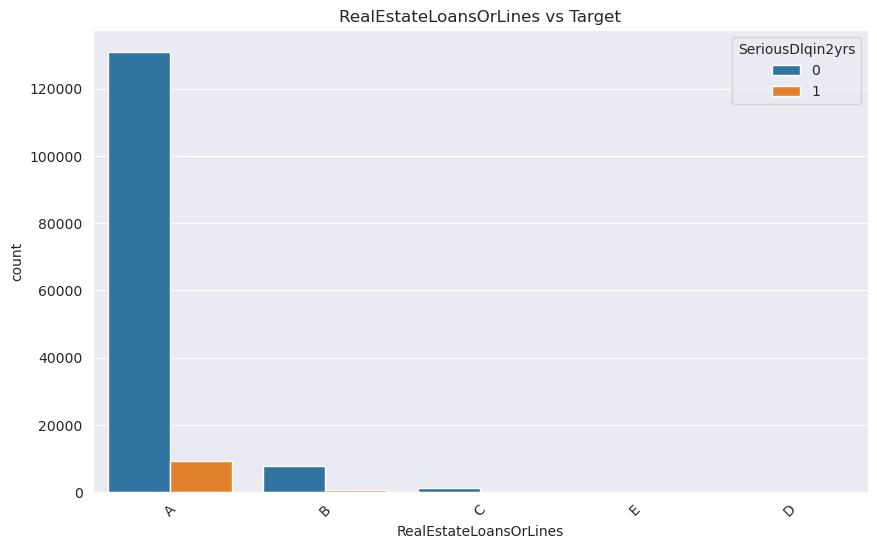

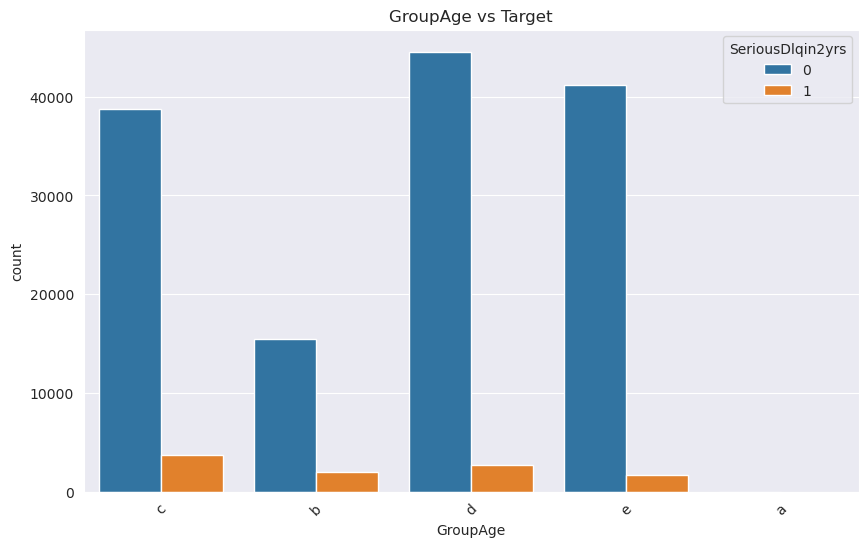

In [105]:
# For categorical features (if any)
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(12, 8))
    sns.countplot(x=feature, hue='SeriousDlqin2yrs', data=df, palette=['skyblue', 'salmon'])
    plt.xticks(rotation=45)
    plt.title(f'{feature} vs Default Status', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend(title='Default', labels=['No Default', 'Default'])
    plt.grid(True, alpha=0.3)
    plt.show()


## 4. Data Preprocessing

### 4.1 Handling Missing Values


In [106]:
# Calculate means for filling missing values
mean_age = df['age'].mean()
mean_income = df['MonthlyIncome'].mean()
mean_dependents = df['NumberOfDependents'].mean()

# Fill missing values with calculated means
df['age'].fillna(mean_age, inplace=True)
df['MonthlyIncome'].fillna(mean_income, inplace=True)
df['NumberOfDependents'].fillna(mean_dependents, inplace=True)


In [107]:
# Verify that missing values have been handled
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 9   NumberOfDependents                    150000 non-null  float64
 10  RealEstateLoansOrLines                150000 non-null  object 
 11  

### 4.2 Feature Analysis with Target Variable


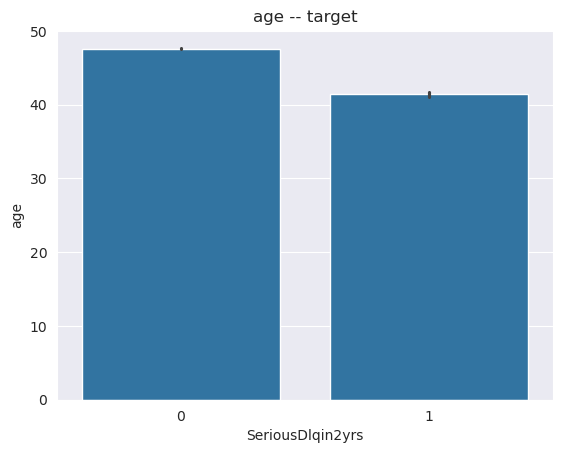

In [108]:
# Age vs Default Status
plt.figure(figsize=(12, 6))
sns.barplot(y='age', x='SeriousDlqin2yrs', data=df, palette=['skyblue', 'salmon'])
plt.title('Average Age by Default Status', fontsize=16)
plt.xlabel('Default Status (1 = Default, 0 = No Default)', fontsize=14)
plt.ylabel('Average Age', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()


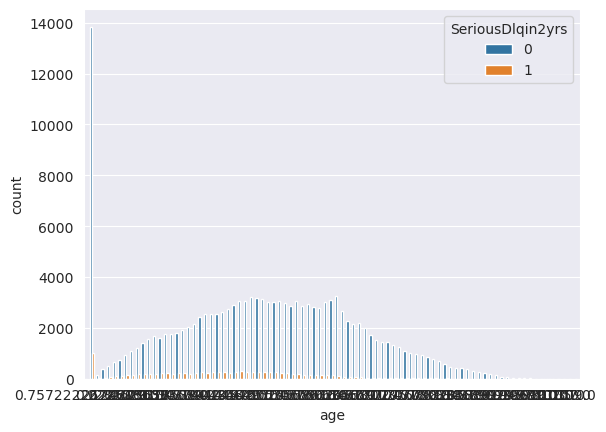

In [109]:
# Age distribution by default status
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='SeriousDlqin2yrs', multiple='stack', palette=['skyblue', 'salmon'])
plt.title('Age Distribution by Default Status', fontsize=16)
plt.xlabel('Age (years)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Default', labels=['No Default', 'Default'])
plt.grid(True, alpha=0.3)
plt.show()


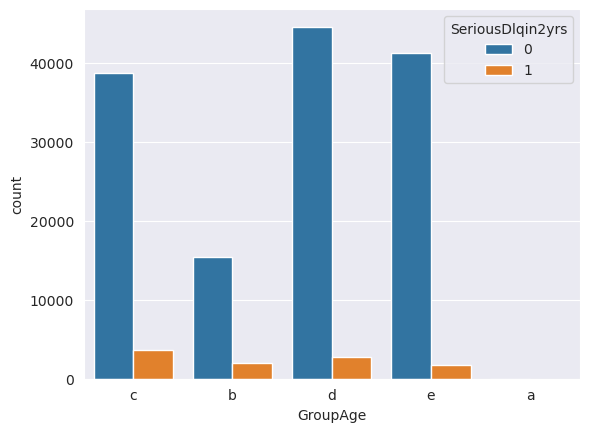

In [110]:
# GroupAge vs Default Status
plt.figure(figsize=(12, 6))
sns.countplot(x='GroupAge', hue='SeriousDlqin2yrs', data=df, palette=['skyblue', 'salmon'])
plt.title('Default Status by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Default', labels=['No Default', 'Default'])
plt.grid(True, alpha=0.3)
plt.show()


### 4.3 Encoding Categorical Variables


In [111]:
# Convert categorical variables to numeric if they represent ordered categories
df_encoded = df.copy()

# Encode RealEstateLoansOrLines (A, B, C... represent increasing values)
if 'RealEstateLoansOrLines' in df.columns and df['RealEstateLoansOrLines'].dtype == 'object':
    # Create a mapping from letters to numbers (A=1, B=2, etc.)
    mapping = {chr(65+i): i+1 for i in range(26)}  # A=1, B=2, etc.
    df_encoded['RealEstateLoansOrLines_numeric'] = df['RealEstateLoansOrLines'].map(mapping)
    print("Encoded RealEstateLoansOrLines")

# Encode GroupAge
if 'GroupAge' in df.columns and df['GroupAge'].dtype == 'object':
    # Similar approach for GroupAge
    unique_values = df['GroupAge'].unique()
    mapping = {val: idx for idx, val in enumerate(sorted(unique_values))}
    df_encoded['GroupAge_numeric'] = df['GroupAge'].map(mapping)
    print("Encoded GroupAge")
    print(f"Mapping: {mapping}")


## 5. Model Training

### 5.1 Data Preparation


In [112]:
# Prepare features (X) and target variable (y)
X = df_encoded.drop(columns=['SeriousDlqin2yrs', 'RealEstateLoansOrLines', 'GroupAge'])
y = df_encoded['SeriousDlqin2yrs']

# Display selected features
print("Selected features for modeling:")
print(X.columns.tolist())


In [113]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


((112500, 11), (37500, 11))

### 5.2 Logistic Regression Model


In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

# Train a logistic regression model
model = LogisticRegression(max_iter=10000, random_state=RANDOM_STATE)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]


In [117]:
# View first few predictions
print("First 10 predictions (0 = No Default, 1 = Default):")
print(y_pred[:10])


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Evaluate the model
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)
plt.show()


## 6. Feature Importance


In [ ]:
# Extract feature importance from the logistic regression model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Sort by absolute coefficient value
coefficients['Abs_Coefficient'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Feature Importance (Logistic Regression Coefficients)', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()


## 7. Conclusions

Based on our analysis and initial model:

1. The logistic regression model provides a baseline for predicting loan defaults
2. Key factors influencing default probability include:
   - Past delinquency history
   - Age of the borrower
   - Debt ratio
   - Monthly income

Next steps:
1. Try more complex models like Random Forest, XGBoost, etc.
2. Perform hyperparameter tuning to optimize model performance
3. Address class imbalance issues using techniques like SMOTE
4. Create ensemble models to improve prediction accuracy
